# Supplementary Figure 1

---

<br>

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

## Settings for saving figures as pdf

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Set environmental constants

In [3]:
# Set path where files are stored
path = '/Volumes/elegans/rna_sequencing'

## Opening Dataset file

In [4]:
# Open dataset generated as part of the pre-processing step
dataset = pd.read_csv(f'{path}/dataset_+SSP+SL+HAIRPIN.tsv', sep='\t')

<br>

# Panel: Measure of strand bias in direct-cDNA experiments

In [5]:
strand_bias = pd.DataFrame()

idx=0

# count number of sense and antisense reads per run
for ID, reads in dataset.groupby('run'):
    
    strand_bias.loc[idx,'run'] = ID
    
    sense = len(reads[reads['read_orientation'] == 'sense'])
    strand_bias.loc[idx,'sense'] = sense
    
    antisense = len(reads[reads['read_orientation'] == 'antisense'])
    strand_bias.loc[idx,'antisense'] = antisense
    
    idx = idx+1

# Add new columns
strand_bias['total'] = strand_bias['sense'] + strand_bias['antisense']
strand_bias['%sense'] = round(strand_bias['sense'] / strand_bias['total'] * 100, 2)
strand_bias['%antisense'] = round(strand_bias['antisense'] / strand_bias['total'] * 100, 2)

# set columns type
col_types = {'run':object, 'sense':int, 'antisense':int, 'total':int, '%sense':float, '%antisense':float}
strand_bias = strand_bias.astype(col_types)

# order rows based on runs
runs = ['SSP_1', 'SSP_2', 'SSP_3', 'SSP_4', 'SSP_5', 'SSP_6', 'SL1_1', 'NP_1', 'NP_2', 'NP_3', 'NP_4', 'NP_5']
strand_bias['run'] = pd.Categorical(strand_bias['run'], categories = runs)
strand_bias = strand_bias.sort_values(by = 'run')

In [6]:
strand_bias

,run,sense,antisense,total,%sense,%antisense
6,SSP_1,15288,841123,856411,1.79,98.21
7,SSP_2,6428,259003,265431,2.42,97.58
8,SSP_3,14821,199942,214763,6.90,93.10
9,SSP_4,20392,308479,328871,6.20,93.80
10,SSP_5,2820,73012,75832,3.72,96.28
11,SSP_6,40112,479990,520102,7.71,92.29
5,SL1_1,1606790,4404901,6011691,26.73,73.27
0,NP_1,1856,103800,105656,1.76,98.24
1,NP_2,33956,1923233,1957189,1.73,98.27
2,NP_3,5400,391747,397147,1.36,98.64


In [7]:
# Enter raw data
SSP_sense = np.array(strand_bias[strand_bias['run'].str.contains('SSP')]['%sense'])
SL1_sense = np.array(strand_bias[strand_bias['run'].str.contains('SL1')]['%sense'])
NP_sense = np.array(strand_bias[strand_bias['run'].str.contains('NP')]['%sense'])

SSP_antisense = np.array(strand_bias[strand_bias['run'].str.contains('SSP')]['%antisense'])
SL1_antisense = np.array(strand_bias[strand_bias['run'].str.contains('SL1')]['%antisense'])
NP_antisense = np.array(strand_bias[strand_bias['run'].str.contains('NP')]['%antisense'])

# Calculate the average
SSP_sense_mean = np.mean(SSP_sense)
SL1_sense_mean = np.mean(SL1_sense)
NP_sense_mean = np.mean(NP_sense)

SSP_antisense_mean = np.mean(SSP_antisense)
SL1_antisense_mean = np.mean(SL1_antisense)
NP_antisense_mean = np.mean(NP_antisense)

# Calculate the standard deviation
SSP_sense_std = np.std(SSP_sense)
SL1_sense_std = np.std(SL1_sense)
NP_sense_std = np.std(NP_sense)

SSP_antisense_std = np.std(SSP_antisense)
SL1_antisense_std = np.std(SL1_antisense)
NP_antisense_std = np.std(NP_antisense)

# Create lists for the plot
experiments = ['SSP primer', 'SL1 primer', 'No Primer']
x_pos = np.arange(len(experiments))

mean_sense = [SSP_sense_mean, SL1_sense_mean, NP_sense_mean]
error_sense = [SSP_sense_std, SL1_sense_std, NP_sense_std]

mean_antisense = [SSP_antisense_mean, SL1_antisense_mean, NP_antisense_mean]
error_antisense = [SSP_antisense_std, SL1_antisense_std, NP_antisense_std]

In [8]:
summary_per_experiments = pd.DataFrame(dict( experiments=experiments, 
                                             sense_mean=mean_sense, sense_std=error_sense,
                                             antisense_mean=mean_antisense, antisense_std=error_antisense))


summary_per_experiments.columns = ['Experiments', 'Mean %Sense', 'Std Sense', 'Mean %Antisense', 'Std Antisense']

summary_per_experiments

,Experiments,Mean %Sense,Std Sense,Mean %Antisense,Std Antisense
0,SSP primer,4.79,2.263051,95.21,2.263051
1,SL1 primer,26.73,0.000000,73.27,0.000000
2,No Primer,1.64,0.149533,98.36,0.149533


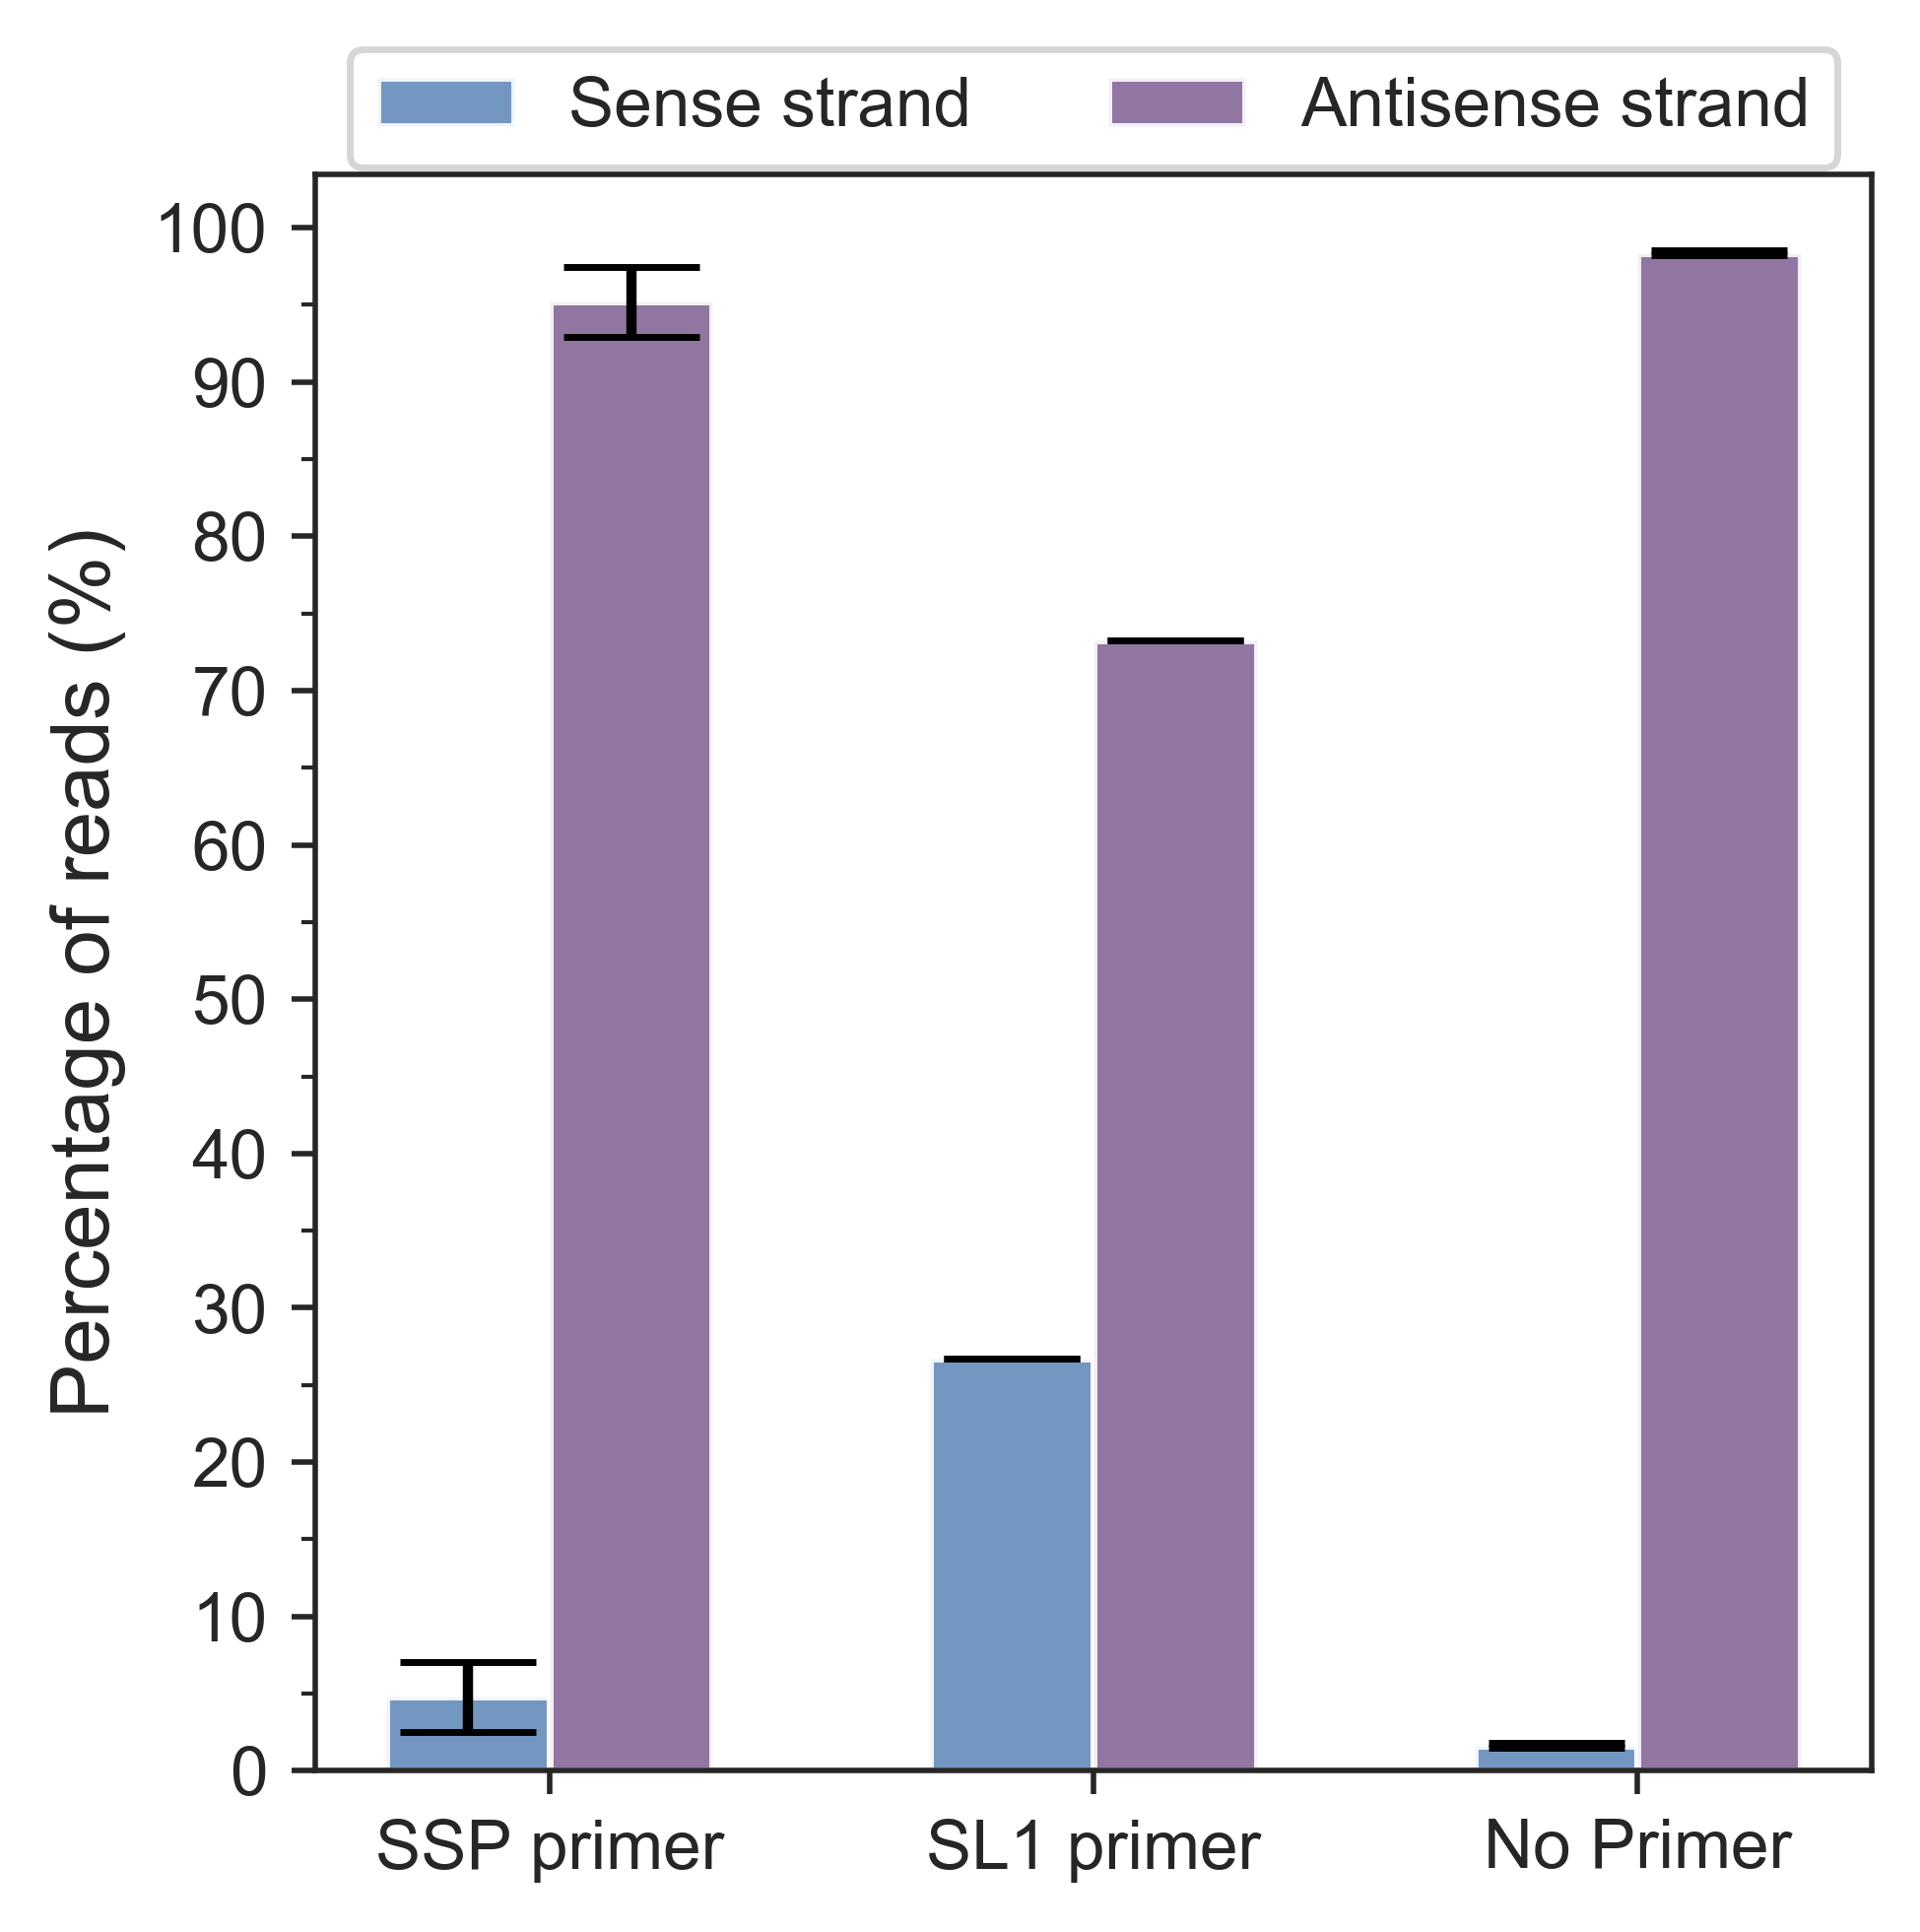

In [9]:
%matplotlib inline

# initialization of plot
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(4,4), dpi=500)
width = 0.3

# data
sense = ax.bar(x_pos- width/2, mean_sense, yerr=error_sense, align='center', alpha=0.9, ecolor='black', capsize=10, width=width, color='#658cbb',label='Sense strand')
antisense = ax.bar(x_pos+ width/2, mean_antisense, yerr=error_antisense, align='center', alpha=0.9, ecolor='black', capsize=10, width=width, color='#856798',label='Antisense strand')

# plots settings
ax.set_ylabel('Percentage of reads (%)', fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(experiments)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='y', which='minor', left=True)
l = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.tight_layout()

# save
plt.savefig('SupFig1-strand_bias_in_direct-cDNA_exp.pdf', dpi=500, bbox_inches='tight')

<font size="4">**Supplementary Figure 1:**<br></font>
Strand bias in ONT direct-cDNA experiments. For each experiment, we measured the number of reads coming from each strand of the cDNA molecule sequenced. SSP primer: 2nd strand synthesis using the SSP primer (n=6). SL1 primer: 2nd strand synthesis using a SL1-specific primer (n=1). No primer: 2nd strand synthesis without using any primer (n=5).